# Libraries

In [6]:
#Importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings(action='ignore')
import os 
import re 
import itertools 
from datetime import datetime 
import datetime as dt

# Loading the data set

In [7]:
#Loading the dataset
df = pd.read_csv('month.csv')

# Basic Code

In [8]:
#Reading first five rows of the data set
df.head()

,Lactation No,Month,Activity,Rest Time,Rest Per Bout,Restlessness Ratio,SE Activity,SE Rest Time,SE Rest Per Bout,SE Restlessness Ratio,P-Value Activity,P-Value Rest Time,P-Value Rest Per Bout,P-Value Restlessness Ratio
0,1,1,227,594,69,4.04,3.99,7.47,1.14,0.27,0.001,0.001,0.001,0.001
1,1,2,199,579,62,3.77,3.14,7.99,1.36,0.15,0.001,0.001,0.001,0.001
2,1,3,213,565,56,4.07,2.81,7.13,0.69,0.17,0.001,0.001,0.001,0.001
3,1,4,218,590,66,3.71,2.55,5.53,0.89,0.11,0.001,0.001,0.001,0.001
4,1,5,246,540,60,4.51,3.49,5.15,0.73,0.15,0.001,0.001,0.001,0.001


In [9]:
#Reading last five rows of the data set
df.tail()

,Lactation No,Month,Activity,Rest Time,Rest Per Bout,Restlessness Ratio,SE Activity,SE Rest Time,SE Rest Per Bout,SE Restlessness Ratio,P-Value Activity,P-Value Rest Time,P-Value Rest Per Bout,P-Value Restlessness Ratio
30,3,8,164,642,79,2.15,8.50,16.91,3.48,0.14,0.001,0.001,0.001,0.001
31,3,9,197,633,94,2.95,5.15,12.54,4.57,0.13,0.001,0.001,0.001,0.001
32,3,10,205,650,97,2.93,5.84,11.90,2.50,0.19,0.001,0.001,0.001,0.001
33,3,11,226,658,77,3.05,5.33,8.75,1.93,0.11,0.001,0.001,0.001,0.001
34,3,12,225,703,89,2.68,12.20,15.52,3.42,0.17,0.001,0.001,0.001,0.001


In [10]:
#shape of the data set containing 35 rows and 14 columns
df.shape

(35, 14)

# Graph-1 

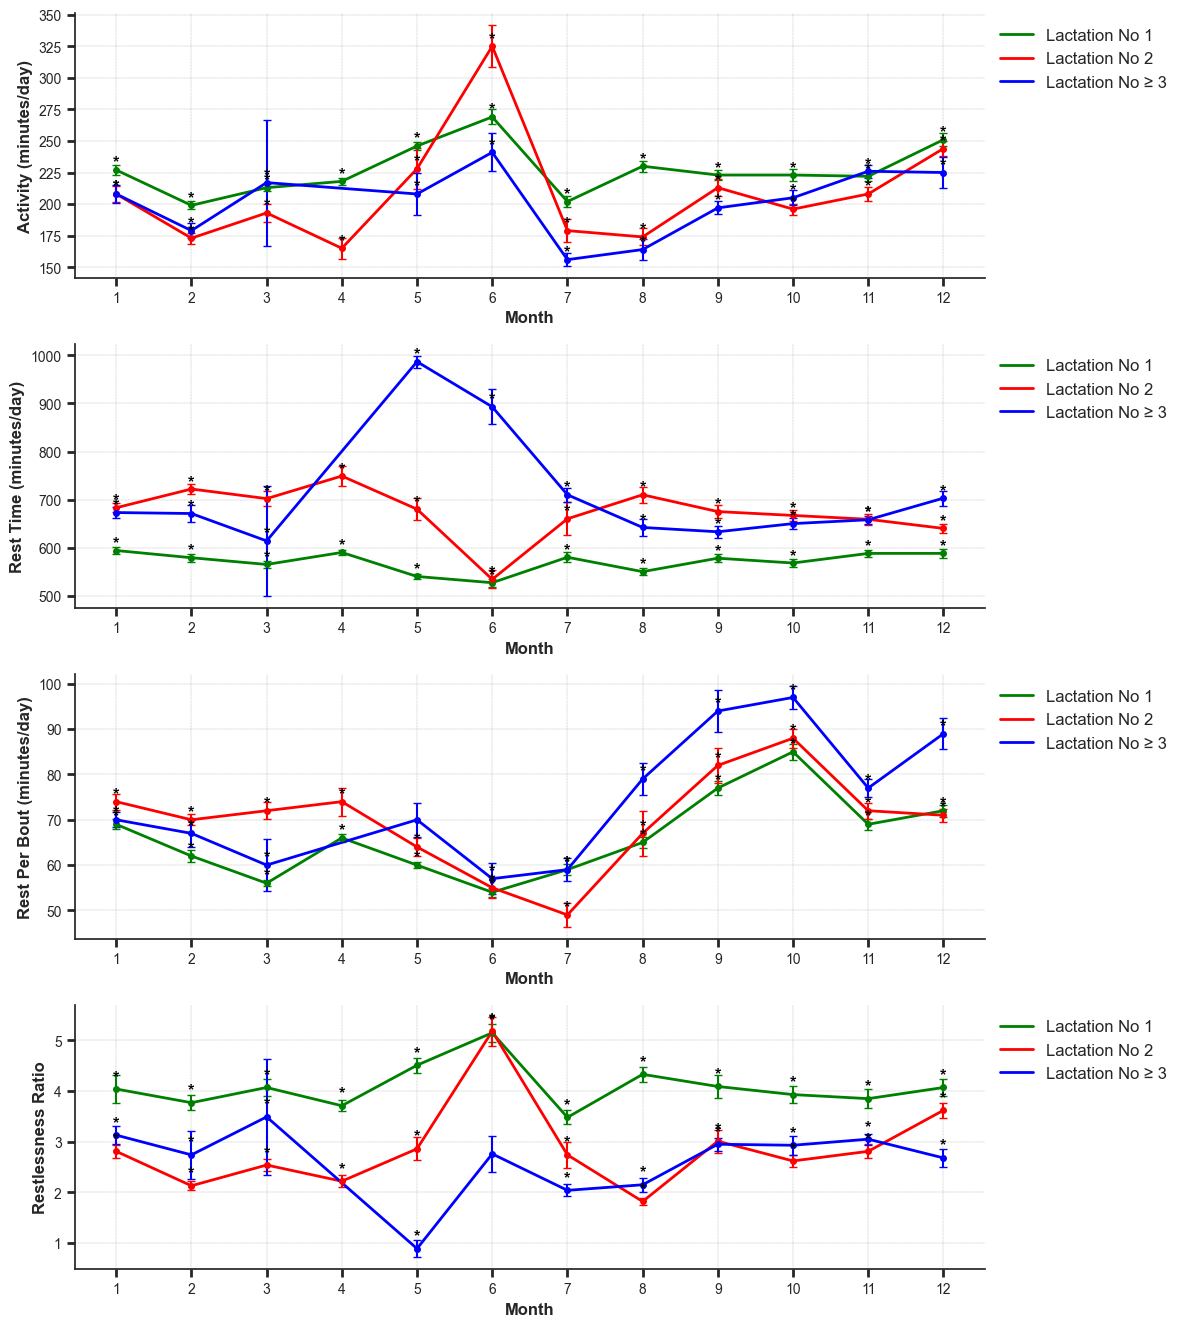

In [12]:
# Setting chart style
sns.set(style="ticks")

# Defining a function to add asterisks based on p-values
def add_asterisks(p_value):
    if p_value < 0.05:
        return '*'
    else:
        return ''

# Creating a more visually appealing color palette
cmap = ['green', 'red', 'blue']  # Using descriptive color names

# Creating a figure with 4 subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 14))

# Selecting variables of interests for the chart
variables = ['Activity', 'Rest Time', 'Rest Per Bout', 'Restlessness Ratio', 'Month']
se_columns = ['SE Activity', 'SE Rest Time', 'SE Rest Per Bout', 'SE Restlessness Ratio']
p_value_columns = ['P-Value Activity', 'P-Value Rest Time', 'P-Value Rest Per Bout', 'P-Value Restlessness Ratio']

# Creating a For loop through each variable of interest
for i, (variable, se_column, p_value_column) in enumerate(zip(variables, se_columns, p_value_columns), 1):
    ax = axs[i-1]
    # Ploting variable of interests over days with the standard error vertical bars
    for lactation_no, color in zip(df['Lactation No'].unique(), cmap):
        filtered_df = df[df['Lactation No'] == lactation_no]
        label = f'Lactation No {lactation_no}' if lactation_no < 3 else 'Lactation No ≥ 3'
        sns.lineplot(x='Month', y=variable, data=filtered_df,
                     ax=ax, label=label, color=color, linewidth=2)
        # Adding the standard error vertical bars with separate color for each line
        ax.errorbar(filtered_df['Month'], filtered_df[variable],
                    yerr=filtered_df[se_column],
                    fmt='o', markersize=4, capsize=3, color=color, label='_nolegend_')
        # Annotating with asterisks based on p-values for each lactation No
        for day, p_value in zip(filtered_df['Month'], filtered_df[p_value_column]):
            asterisk = add_asterisks(p_value)
            if asterisk:
                ax.text(day, filtered_df.loc[filtered_df['Month'] == day, variable].values[0] + 0.1,
                        asterisk, ha='center', va='bottom', color='black', fontsize=12, fontweight='bold')
    # Customizing plot aesthetics
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=12)  # Placing legend outside of the chart
    ax.set_xlabel('Month', fontsize=12, fontweight='bold')
    if variable != 'Restlessness Ratio':
        ax.set_ylabel(f'{variable} (minutes/day)', fontsize=12, fontweight='bold')
    else:
        ax.set_ylabel(f'{variable}', fontsize=12, fontweight='bold')
    ax.spines[['top', 'right']].set_visible(False)
    ax.grid(True, color='gray', linestyle='--', linewidth=0.2)  # Using lightgray color for grid lines
    ax.tick_params(axis='both', which='both', labelsize=10, width=2)
    # Adding x-label and x-ticks for all subplots
    ax.set_xticks(range(1, 13))
    ax.set_xlabel('Month', fontsize=12, fontweight='bold')

# Saving the plot in high resolution
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('month_chart.png', dpi=600, bbox_inches='tight')  # Saving with tight bounding box
# Show the chart
plt.show()

# Loading the data set

In [19]:
#Reading the data set
df = pd.read_csv('days_01.csv')

# Basic Coding

In [20]:
#Reading first few rows of data set
df.head()

,Lactation No,Days,Activity,Rest Time,Rest Per Bout,Restlessness Ratio,SE Activity,SE Rest Time,SE Rest Per Bout,SE Restlessness Ratio,P-Value Activity,P-Value Rest Time,P-Value Rest Per Bout,P-Value Restlessness Ratio
0,1,-14,223.03,688.92,72.16,2.79,6.46,11.96,1.36,0.11,0.000,0.0,0.0,0.0
1,1,-13,194.29,653.65,70.58,2.75,4.15,10.21,1.72,0.11,0.259,0.0,0.0,0.0
2,1,-12,193.45,647.06,70.97,2.78,3.88,10.17,1.77,0.10,0.238,0.0,0.0,0.0
3,1,-11,194.71,642.38,68.58,2.78,3.75,9.43,1.97,0.09,0.232,0.0,0.0,0.0
4,1,-10,195.95,647.60,68.31,2.74,3.82,9.65,2.00,0.09,0.194,0.0,0.0,0.0


In [21]:
#Reading last few rows of data set
df.tail()

,Lactation No,Days,Activity,Rest Time,Rest Per Bout,Restlessness Ratio,SE Activity,SE Rest Time,SE Rest Per Bout,SE Restlessness Ratio,P-Value Activity,P-Value Rest Time,P-Value Rest Per Bout,P-Value Restlessness Ratio
82,3,10,199.51,612.13,79.40,2.92,17.47,24.99,5.72,0.29,0.002,0.648,0.091,0.376
83,3,11,199.14,613.19,75.65,3.18,19.43,24.13,5.84,0.37,0.010,0.653,0.565,0.397
84,3,12,187.61,617.82,75.27,3.29,13.07,20.77,8.08,0.17,0.371,0.216,0.055,0.623
85,3,13,189.31,622.04,76.31,2.78,14.42,26.82,5.77,0.35,0.355,0.555,0.266,0.688
86,3,14,179.47,618.95,74.09,2.67,10.03,25.61,4.15,0.21,0.189,0.000,0.000,0.001


# Chart - 2

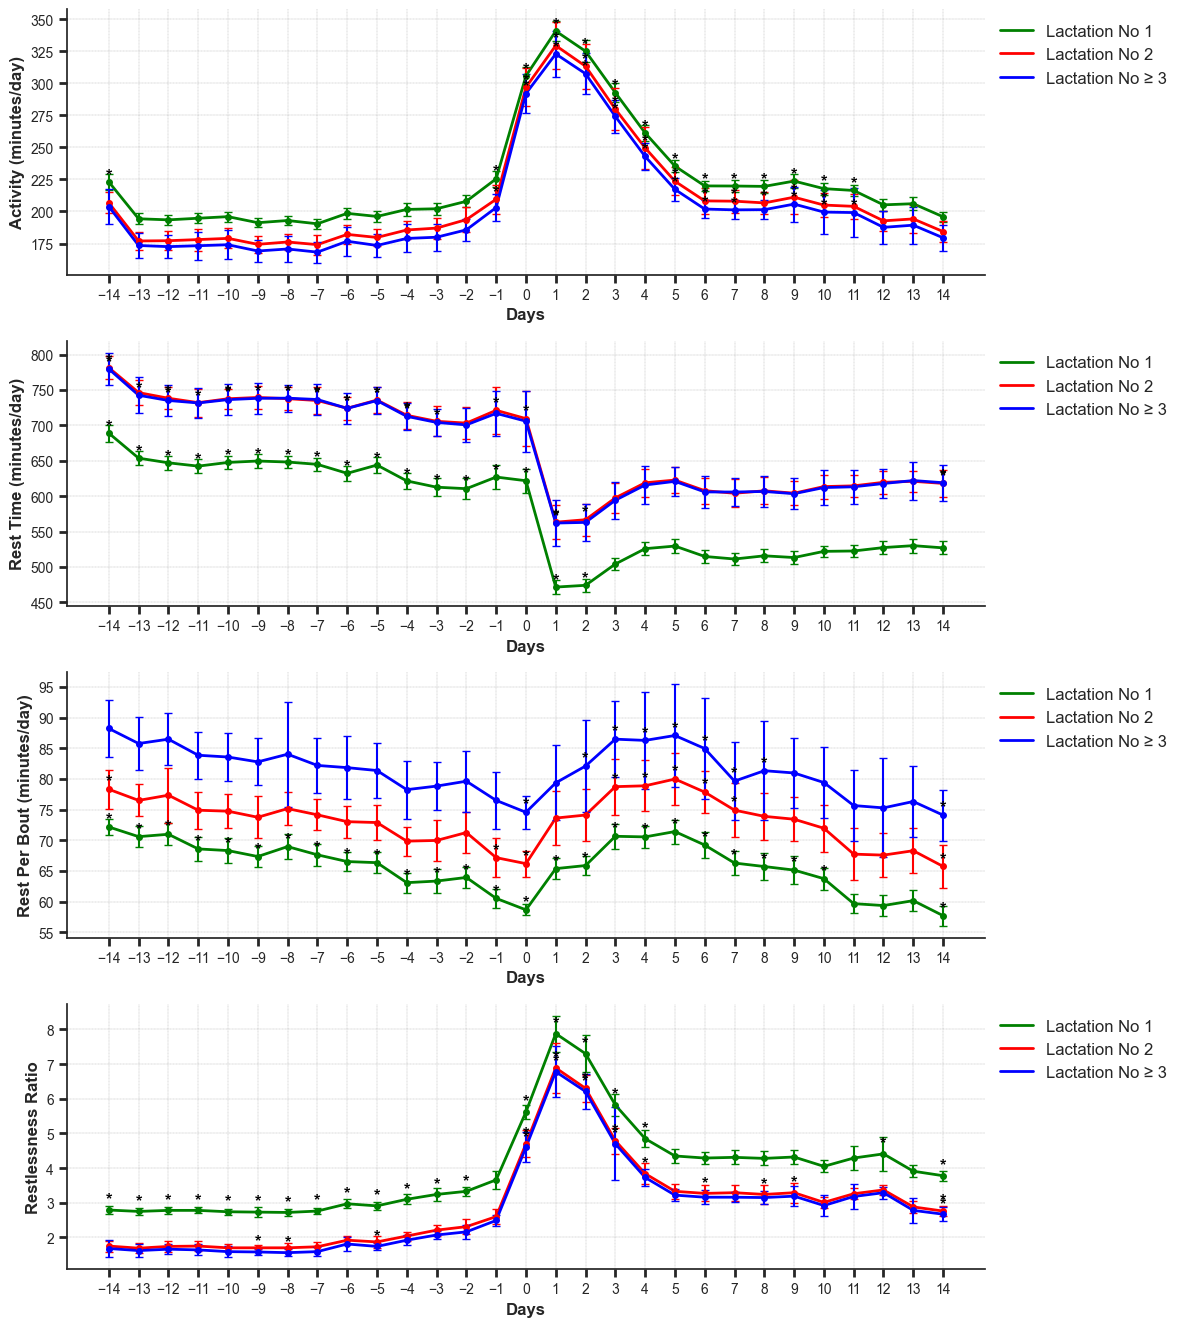

In [11]:
# Setting background style for the chart
sns.set(style="ticks")

# Defining a function to add asterisks based on p-values
def add_asterisks(p_value):
    if p_value < 0.05:
        return '*'
    else:
        return ''

# Creating a color palette
cmap = ['green', 'red', 'blue']  # Using descriptive color for the lines

# Creating a figure with 4 subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 14))

# Selection of variables of interests for the chart
variables = ['Activity', 'Rest Time', 'Rest Per Bout', 'Restlessness Ratio']
se_columns = ['SE Activity', 'SE Rest Time', 'SE Rest Per Bout', 'SE Restlessness Ratio']
p_value_columns = ['P-Value Activity', 'P-Value Rest Time', 'P-Value Rest Per Bout', 'P-Value Restlessness Ratio']

# Creating a For loop through each variable of interest
for i, (variable, se_column, p_value_column) in enumerate(zip(variables, se_columns, p_value_columns), 1):
    ax = axs[i-1]
    # Plot variable of interests over days with the standard error vertical bars
    for lactation_no, color in zip(df['Lactation No'].unique(), cmap):
        filtered_df = df[df['Lactation No'] == lactation_no]
        label = f'Lactation No {lactation_no}' if lactation_no < 3 else 'Lactation No ≥ 3'
        sns.lineplot(x='Days', y=variable, data=filtered_df,
                     ax=ax, label=label, color=color, linewidth=2)
        # Adding standard error vertical bars with separate color for each line
        ax.errorbar(filtered_df['Days'], filtered_df[variable],
                    yerr=filtered_df[se_column],
                    fmt='o', markersize=4, capsize=3, color=color, label='_nolegend_')
        # Annotating with asterisks based on p-values for each lactation No
        for day, p_value in zip(filtered_df['Days'], filtered_df[p_value_column]):
            asterisk = add_asterisks(p_value)
            if asterisk:
                ax.text(day, filtered_df.loc[filtered_df['Days'] == day, variable].values[0] + 0.1,
                        asterisk, ha='center', va='bottom', color='black', fontsize=12, fontweight='bold')
    # Customizing plot aesthetics
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=12)  # Placing the legend outside of the chart
    ax.set_xlabel('Days', fontsize=12, fontweight='bold')
    if variable != 'Restlessness Ratio':
        ax.set_ylabel(f'{variable} (minutes/day)', fontsize=12, fontweight='bold')
    else:
        ax.set_ylabel(f'{variable}', fontsize=12, fontweight='bold')
    ax.spines[['top', 'right']].set_visible(False)
    ax.grid(True, color='gray', linestyle='--', linewidth=0.2)  # Using lightgray for grid lines
    ax.tick_params(axis='both', which='both', labelsize=10, width=2)
    # Adding x-label and x-ticks for all subplots
    ax.set_xticks(range(-14, 15))
    ax.set_xlabel('Days', fontsize=12, fontweight='bold')

# Saving the plot in high resolution
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('days_chart.png', dpi=600, bbox_inches='tight')  # Saving with tight bounding box
# Show the chart
plt.show()